# 4. Model test and compilation

In [12]:
import numpy as np
import h5py
import keras
import k3d
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from ipywidgets import interact, widgets

import src

# 4.1 Trained Model definition

In [2]:
with h5py.File('data/processed/stanford6.h5', 'r') as dataset:
    x_test = np.array(dataset['test/X'])
    y_test = np.array(dataset['test/Y'])

classnames = {
    0: 'Floodplain',
    1: 'Pointbar',
    2: 'Channel',
    3: 'Boundary',
}

model = keras.models.load_model('models/stanford-32.h5')
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 8, 8, 32)          4736      
_________________________________________________________________
activation_35 (Activation)   (None, 8, 8, 32)          0         
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 4, 4, 64)          51264     
_________________________________________________________________
activation_36 (Activation)   (None, 4, 4, 64)          0         
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 4, 4, 64)        

# 4.2 Trained model Evaluation

Evaluating model...

Mean accuracy: 	0.885346518766208
Precision: 	0.6200887816113339
Recall: 	0.6115826964525135
F1-Score: 	0.6092991465912694


<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

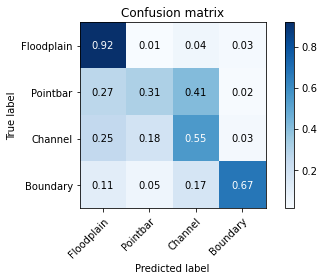

In [4]:
def mean_class_accuracy(cm):
    fp = cm.sum(axis=0) - np.diag(cm)  
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    return np.mean((tp + tn) / (tp + tn + fp + fn))

print('Evaluating model...\n')
y_pred = np.argmax(model.predict(x_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)

matrix = confusion_matrix(y_true, y_pred)
accuracy = mean_class_accuracy(matrix)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

print(f'Mean accuracy: \t{accuracy}')
print(f'Precision: \t{precision}')
print(f'Recall: \t{recall}')
print(f'F1-Score: \t{f1}')

src.plot_confusion_matrix(matrix, classnames.values(), title="Confusion matrix")

# 4.3 Trained model Preview

In [13]:
image_size = 32
output_shape = [213 + 1 - image_size, 224 + 1 - image_size, 119 + 1 - image_size]

def plot_section(z=0):
    plt.subplot(121)
    plt.imshow(y_true.reshape(output_shape)[:,:,z].T)
    plt.subplot(122)
    plt.imshow(y_pred.reshape(output_shape)[:,:,z].T)

interact(plot_section, z=widgets.IntSlider(min=0,max=119 - image_size,step=1,value=0))

interactive(children=(IntSlider(value=0, description='z', max=87), Output()), _dom_classes=('widget-interact',…

<function __main__.plot_section(z=0)>

# 4.4 Trained model 3D Preview

In [9]:
color_map = (0x3A528B, 0x20908C, 0xFDE724)

plot = k3d.plot(camera_auto_fit=False)
obj = k3d.voxels(y_pred.reshape(output_shape).T, color_map, compression_level=1)
plot += obj
plot.camera=[150, 230, -40, 60, 85, 80, 0.0, 0.0, -1.0]
plot.display()

C:\Users\LUCASADEEE\.conda\envs\ML\lib\site-packages\traittypes\traittypes.py:101: UserWarning: Given trait value dtype "int64" does not match required type "uint8". A coerced copy has been created.
  np.dtype(self.dtype).name))


Output()

In [10]:
color_map = (0x3A528B, 0x20908C, 0xFDE724)

plot = k3d.plot(camera_auto_fit=False)
obj = k3d.voxels(y_true.reshape(output_shape).T, color_map, compression_level=1)
plot += obj
plot.camera=[150, 230, -40, 60, 85, 80, 0.0, 0.0, -1.0]
plot.display()

Output()